In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline

In [20]:
!pip install sklearn

     |████████████████████████████████| 7.1 MB 3.0 MB/s eta 0:00:01
     |████████████████████████████████| 294 kB 30.2 MB/s eta 0:00:01
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1315 sha256=946312d7166a3624cbde183533daadd6fe7c6f456ce0fa4b907ae3bd6dfe84fc
  Stored in directory: /home/erick/.cache/pip/wheels/23/9d/42/5ec745cbbb17517000a53cecc49d6a865450d1f5cb16dc8a9c
Successfully built sklearn


In [52]:
request_reply_df = pd.read_csv("./data/requestreply.csv", header=None)
reply_reply_df = pd.read_csv("./data/replyreply.csv", header=None)

In [44]:
from scipy import stats

In [16]:
request_reply_df.head()

,Malicious,2,3,4,5,6,7,8,9,10,...,92,93,94,95,96,97,98,99,100,101
0,0,20.825148,108.520031,112.684965,15.868187,330.741167,230.258942,217.554092,113.749981,176.881075,...,14.228106,27.732849,27.627945,15.902042,113.047838,13.890982,12.917995,4.037857,24.651051,7.324934
1,0,224.698067,121.433020,18.800974,4.509211,9.665012,3.786087,4.933119,7.514000,9.127855,...,11.039972,10.627031,7.166862,9.289980,9.554863,10.976076,4.159927,12.969017,25.047064,8.896112
2,0,109.153032,9.268045,27.769089,11.770964,6.238937,9.030819,4.626036,9.043217,7.443190,...,9.481907,9.615898,13.746023,4.111052,13.911009,12.578011,16.284943,5.783081,9.770870,10.164976
3,0,214.911222,113.813162,11.111975,5.372047,11.233091,113.419056,11.961937,76.493979,2.870083,...,4.685879,8.937836,5.654097,9.099007,102.588892,3.908157,3.888845,11.066198,3.864050,15.835047
4,0,112.665892,103.324890,4.642010,527.385950,424.393892,320.701122,216.873884,113.031864,82.963943,...,9.331942,5.966902,9.373903,5.156994,8.961916,3.869057,9.786844,9.626150,20.761013,7.896900


In [96]:
def create_summary_dataset(dataset):
    dataset = dataset.copy()
    mal = dataset.pop("Malicious")
    amean = dataset.copy().apply(np.mean, axis=1)
    sd = dataset.copy().apply(np.std, axis=1)
    var = dataset.copy().apply(np.var, axis=1)
    maximum = dataset.copy().apply(np.max, axis=1)
    minimum = dataset.copy().apply(np.min, axis=1)
    geo_mean = dataset.copy().apply(np.abs).apply(stats.gmean, axis=1)
    har_mean = dataset.copy().apply(np.abs).apply(stats.hmean, axis=1)
    summary_data = pd.DataFrame()
    summary_data["Malicious"] = mal.values
    summary_data["Arithmetic_Mean"] = amean.values
    summary_data["Standard_Deviation"] = sd.values
    summary_data["Variance"] = var.values
    summary_data["Max"] = maximum.values
    summary_data["Min"] = minimum.values
    summary_data["Geometric_Mean"] = geo_mean.values
    summary_data["Harmonic_Mean"] = har_mean.values
    return summary_data

In [97]:
summary_data = create_summary_dataset(request_reply_df)

In [98]:
summary_data['Malicious']

0        0
1        0
2        0
3        0
4        0
        ..
12295    1
12296    1
12297    1
12298    1
12299    1
Name: Malicious, Length: 12300, dtype: int64

In [99]:
summary_data.head()

,Malicious,Arithmetic_Mean,Standard_Deviation,Variance,Max,Min,Geometric_Mean,Harmonic_Mean
0,0,59.185963,122.067837,14900.556774,667.421103,2.313137,16.443096,8.626193
1,0,22.103214,34.715208,1205.145634,224.698067,3.786087,12.882226,9.803478
2,0,22.907884,57.440960,3299.463856,423.770189,3.897190,10.908328,8.498000
3,0,27.850859,60.939352,3713.604637,419.315100,2.870083,12.481497,8.964352
4,0,29.037657,76.543921,5858.971831,527.385950,2.856970,11.498459,8.442153


In [4]:
def dataset_statistics(df):
    ds_mean = np.mean(df.mean(numeric_only=True))
    ds_median = np.median(df.median(numeric_only=True))
    ds_mean_var = np.mean(df.var(numeric_only=True))
    ds_median_var = np.median(df.var(numeric_only=True))
    return ds_mean, ds_median, ds_mean_var, ds_median_var

In [5]:
request_reply_df.rename(columns={0:'Malicious'}, inplace=True)

In [53]:
request_reply_df.columns = [str(col) for col in request_reply_df.columns]
request_reply_df.drop("1", axis=1, inplace=True)
request_reply_df.rename(columns={"0": "Malicious"}, inplace=True)
request_reply_df.replace({"Malicious": {'legit': 0, 'malware': 1}}, inplace=True)

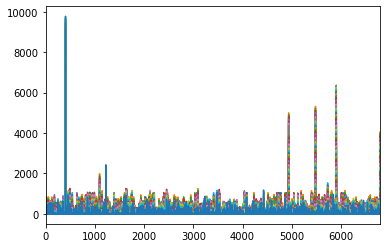

In [7]:
benignware = request_reply_df.loc[request_reply_df["Malicious"] == 0]
benignware.plot(legend=False)

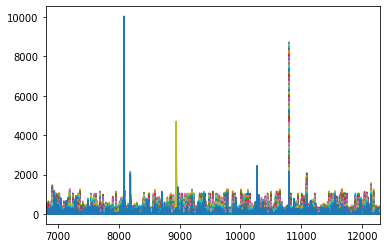

In [8]:
malware = request_reply_df.loc[request_reply_df["Malicious"] == 1]
malware.plot(legend=False)

In [18]:
for i in range(5):
    print(request_reply_df.loc[0][i+1])

20.825148000000002
108.520031
112.68496499999999
15.868186999999999
330.741167


In [66]:
from prototype_model import *

In [23]:
request_reply_fourier = create_fourier_dataset(request_reply_df)
request_reply_cwavelet = create_continuous_wavelet_dataset(request_reply_df)

In [10]:
dataset_statistics(request_reply_fourier)

((58.604390351203385+7.584613306260597e-16j),
 (-1.4514760249295477-5621.282955458517j),
 113461711.81745677,
 100535393.93087971)

In [11]:
dataset_statistics(reply_reply_fourier)

((100.18508077471539+9.62733416023051e-16j),
 (-6.815148765591573+2503.544078804928j),
 152077222.0613499,
 152901167.7689203)

In [12]:
dataset_statistics(request_reply_cwavelet)

(-0.23982914010307635,
 0.032688860041574105,
 97.32855683618969,
 78.07325231009084)

In [13]:
dataset_statistics(reply_reply_cwavelet)

(-0.13882611736088013,
 -0.035714383126698904,
 181.86647260223148,
 176.2678754236699)

In [11]:
import pywt

In [24]:
def high_pass_dataset(dataset):
    scales = [1]
    wavelet = "morl"
    columns = dataset.columns.tolist()
    columns.remove("Malicious")
    wavelet_data = dataset[columns].apply(pywt.cwt, args=(scales, wavelet), axis=1).to_frame()
    wavelet_array = list()
    for i in range(wavelet_data.shape[0]):
        wavelet_array.append(wavelet_data.loc[i][0][0][0])
    wavelet_data = pd.DataFrame(data=wavelet_array)
    wavelet_data["Malicious"] = dataset["Malicious"]
    return wavelet_data

In [50]:
def low_pass_dataset(dataset):
    scales = [1]
    wavelet = "morl"
    columns = dataset.columns.tolist()
    columns.remove("Malicious")
    wavelet_data = dataset[columns].apply(pywt.cwt, args=(scales, wavelet), axis=1).to_frame()
    wavelet_array = list()
    for i in range(wavelet_data.shape[0]):
        wavelet_array.append(wavelet_data.loc[i][0][1][0])
    wavelet_data = pd.DataFrame(data=wavelet_array)
    wavelet_data["Malicious"] = dataset["Malicious"]
    return wavelet_data

In [52]:
high_pass_wavelet = high_pass_dataset(request_reply_df)
low_pass_wavelet = low_pass_dataset(request_reply_df)

In [14]:
features = generate_features(request_reply_df)
model = build_fc_model(features)
fc_qr_history, fc_qr_results = train_model(model, request_reply_df)

Train for 99 steps
Epoch 1/20
99/99 [==============================] - 2s 18ms/step - loss: 3.6526 - accuracy: 0.5400
Epoch 2/20
99/99 [==============================] - 1s 8ms/step - loss: 0.6423 - accuracy: 0.6282
Epoch 3/20
99/99 [==============================] - 1s 8ms/step - loss: 0.5871 - accuracy: 0.6720
Epoch 4/20
99/99 [==============================] - 1s 8ms/step - loss: 0.5485 - accuracy: 0.6997
Epoch 5/20
99/99 [==============================] - 1s 8ms/step - loss: 0.5165 - accuracy: 0.7277
Epoch 6/20
99/99 [==============================] - 1s 8ms/step - loss: 0.4832 - accuracy: 0.7542
Epoch 7/20
99/99 [==============================] - 1s 8ms/step - loss: 0.4601 - accuracy: 0.7722
Epoch 8/20
99/99 [==============================] - 1s 8ms/step - loss: 0.4630 - accuracy: 0.7711
Epoch 9/20
99/99 [==============================] - 1s 8ms/step - loss: 0.4198 - accuracy: 0.8005
Epoch 10/20
99/99 [==============================] - 1s 8ms/step - loss: 0.3883 - accuracy: 0.8235

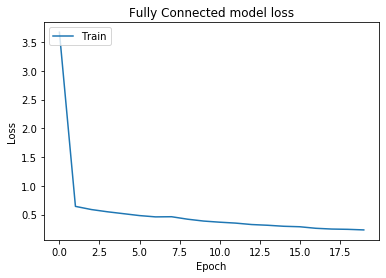

In [15]:
plt.plot(fc_qr_history.history['loss'])
plt.title('Fully Connected model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_features (DenseFeature multiple                  0         
_________________________________________________________________
dense (Dense)                multiple                  25856     
_________________________________________________________________
dense_1 (Dense)              multiple                  65792     
_________________________________________________________________
dense_2 (Dense)              multiple                  65792     
_________________________________________________________________
dense_3 (Dense)              multiple                  257       
Total params: 157,697
Trainable params: 157,697
Non-trainable params: 0
_________________________________________________________________


In [17]:
# features = generate_features(reply_reply_df)
# model = build_fc_model(features)
# fc_rr_history, fc_rr_results = train_model(model, reply_reply_df)

In [18]:
# plt.plot(fc_rr_history.history['loss'])
# # plt.plot(fc_rr_history.history['val_accuracy'])
# plt.title('Fully Connected model loss')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Val'], loc='upper left')
# plt.show()

In [19]:
features = generate_features(request_reply_df)
model = build_conv_model(features)
conv_qr_history, conv_qr_results = train_model(model, request_reply_df)

Train for 99 steps
Epoch 1/20
99/99 [==============================] - 3s 34ms/step - loss: 0.6708 - accuracy: 0.5922
Epoch 2/20
99/99 [==============================] - 2s 23ms/step - loss: 0.6175 - accuracy: 0.6627
Epoch 3/20
99/99 [==============================] - 2s 23ms/step - loss: 0.5904 - accuracy: 0.6948
Epoch 4/20
99/99 [==============================] - 2s 23ms/step - loss: 0.5651 - accuracy: 0.7243
Epoch 5/20
99/99 [==============================] - 2s 23ms/step - loss: 0.5440 - accuracy: 0.7351
Epoch 6/20
99/99 [==============================] - 2s 23ms/step - loss: 0.5278 - accuracy: 0.7426
Epoch 7/20
99/99 [==============================] - 2s 23ms/step - loss: 0.5145 - accuracy: 0.7460
Epoch 8/20
99/99 [==============================] - 2s 23ms/step - loss: 0.5073 - accuracy: 0.7583
Epoch 9/20
99/99 [==============================] - 2s 23ms/step - loss: 0.5019 - accuracy: 0.7614
Epoch 10/20
99/99 [==============================] - 2s 23ms/step - loss: 0.4886 - accurac

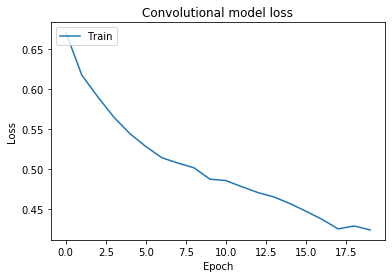

In [20]:
plt.plot(conv_qr_history.history['loss'])
# plt.plot(conv_qr_history.history['val_accuracy'])
plt.title('Convolutional model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [21]:
# features = generate_features(reply_reply_df)
# model = build_conv_model(features)
# conv_rr_history, conv_rr_results = train_model(model, reply_reply_df)

In [22]:
# plt.plot(conv_rr_history.history['accuracy'])
# # plt.plot(conv_rr_history.history['val_accuracy'])
# plt.title('Convolutional model accuracy')
# plt.ylabel('Accuracy')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Val'], loc='upper left')
# plt.show()

In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [22]:
dataset = request_reply_df.copy()
labels = dataset.pop("Malicious")
X_train, X_test, y_train, y_test = train_test_split(dataset, labels, test_size=.2, stratify=labels)

In [23]:
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [24]:
predictions = clf.predict(X_test)

In [25]:
errors = [0 if p == label else 1 for p, label in zip(predictions, y_test)]
rf_accuracy = 1 - (np.sum(errors)/len(errors))
print("Accuracy of random forest classifier:" + str(rf_accuracy))

Accuracy of random forest classifier:0.8105691056910569


In [26]:
from sklearn.metrics import plot_confusion_matrix

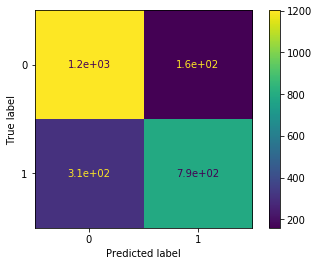

In [27]:
plot_confusion_matrix(clf, X_test, y_test)

In [10]:
features = generate_features(request_reply_fourier)
model = build_fc_model(features)
fourier_fc_qr_history, fourier_fc_qr_results = train_model(model, request_reply_fourier)

Train for 99 steps
Epoch 1/20
99/99 [==============================] - 2s 19ms/step - loss: 0.7231 - accuracy: 0.5000
Epoch 2/20
99/99 [==============================] - 1s 8ms/step - loss: 0.7071 - accuracy: 0.5076
Epoch 3/20
99/99 [==============================] - 1s 8ms/step - loss: 0.6993 - accuracy: 0.5183
Epoch 4/20
99/99 [==============================] - 1s 8ms/step - loss: 0.6968 - accuracy: 0.5238
Epoch 5/20
99/99 [==============================] - 1s 8ms/step - loss: 0.6956 - accuracy: 0.5304
Epoch 6/20
99/99 [==============================] - 1s 8ms/step - loss: 0.6927 - accuracy: 0.5386
Epoch 7/20
99/99 [==============================] - 1s 8ms/step - loss: 0.6918 - accuracy: 0.5394
Epoch 8/20
99/99 [==============================] - 1s 8ms/step - loss: 0.6914 - accuracy: 0.5382
Epoch 9/20
99/99 [==============================] - 1s 9ms/step - loss: 0.6902 - accuracy: 0.5464
Epoch 10/20
99/99 [==============================] - 1s 8ms/step - loss: 0.6901 - accuracy: 0.5431

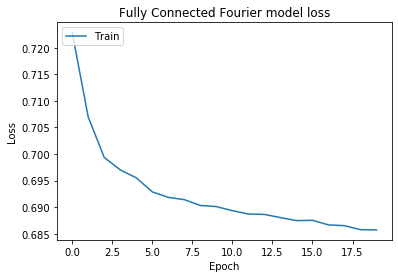

In [11]:
plt.plot(fourier_fc_qr_history.history['loss'])
# plt.plot(fourier_fc_qr_history.history['val_accuracy'])
plt.title('Fully Connected Fourier model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [ ]:
features = generate_features(request_reply_fourier)
model = build_conv_model(features)
fourier_conv_qr_history, fourier_conv_qr_results = train_model(model, request_reply_fourier)

Train for 99 steps
Epoch 1/20
99/99 [==============================] - 4s 36ms/step - loss: 0.7135 - accuracy: 0.5103
Epoch 2/20
99/99 [==============================] - 2s 23ms/step - loss: 0.7069 - accuracy: 0.5115
Epoch 3/20
99/99 [==============================] - 2s 23ms/step - loss: 0.7018 - accuracy: 0.5151
Epoch 4/20
99/99 [==============================] - 2s 23ms/step - loss: 0.6988 - accuracy: 0.5241
Epoch 5/20
99/99 [==============================] - 2s 23ms/step - loss: 0.6961 - accuracy: 0.5264
Epoch 6/20
99/99 [==============================] - 2s 23ms/step - loss: 0.6938 - accuracy: 0.5331
Epoch 7/20
99/99 [==============================] - 2s 23ms/step - loss: 0.6924 - accuracy: 0.5366
Epoch 8/20
99/99 [==============================] - 2s 23ms/step - loss: 0.6919 - accuracy: 0.5345
Epoch 9/20
99/99 [==============================] - 2s 23ms/step - loss: 0.6887 - accuracy: 0.5446
Epoch 10/20
99/99 [==============================] - 2s 23ms/step - loss: 0.6888 - accurac

In [ ]:
plt.plot(fourier_conv_qr_history.history['loss'])
# plt.plot(fourier_conv_qr_history.history['val_accuracy'])
plt.title('Convolutional Fourier model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [32]:
features = generate_features(request_reply_wavelet)
model = build_fc_model(features)
wavelet_fc_qr_history, wavelet_fc_qr_results = train_model(model, request_reply_wavelet)

Train for 99 steps
Epoch 1/20
99/99 [==============================] - 2s 18ms/step - loss: 0.8760 - accuracy: 0.5436
Epoch 2/20
99/99 [==============================] - 1s 8ms/step - loss: 0.6850 - accuracy: 0.5959
Epoch 3/20
99/99 [==============================] - 1s 8ms/step - loss: 0.6403 - accuracy: 0.6351
Epoch 4/20
99/99 [==============================] - 1s 8ms/step - loss: 0.6105 - accuracy: 0.6631
Epoch 5/20
99/99 [==============================] - 1s 8ms/step - loss: 0.5820 - accuracy: 0.6938
Epoch 6/20
99/99 [==============================] - 1s 8ms/step - loss: 0.5559 - accuracy: 0.7199
Epoch 7/20
99/99 [==============================] - 1s 8ms/step - loss: 0.5365 - accuracy: 0.7363
Epoch 8/20
99/99 [==============================] - 1s 8ms/step - loss: 0.5211 - accuracy: 0.7438
Epoch 9/20
99/99 [==============================] - 1s 9ms/step - loss: 0.5005 - accuracy: 0.7630
Epoch 10/20
99/99 [==============================] - 1s 8ms/step - loss: 0.4751 - accuracy: 0.7794

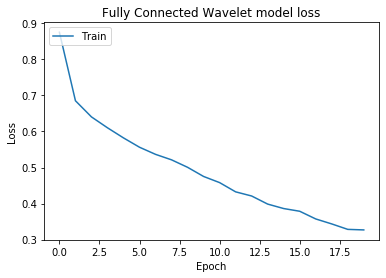

In [33]:
plt.plot(wavelet_fc_qr_history.history['loss'])
plt.title('Fully Connected Wavelet model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [34]:
# features = generate_features(reply_reply_wavelet)
# model = build_fc_model(features)
# wavelet_fc_rr_history, wavelet_fc_rr_results = train_model(model, reply_reply_wavelet)

In [35]:
# plt.plot(wavelet_fc_rr_history.history['accuracy'])
# plt.plot(wavelet_fc_rr_history.history['val_accuracy'])
# plt.title('Fully Connected Wavelet model accuracy')
# plt.ylabel('Accuracy')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Val'], loc='upper left')
# plt.show()

In [36]:
features = generate_features(request_reply_wavelet)
model = build_conv_model(features)
wavelet_conv_qr_history, wavelet_conv_qr_results = train_model(model, request_reply_wavelet)

Train for 99 steps
Epoch 1/20
99/99 [==============================] - 3s 34ms/step - loss: 0.6716 - accuracy: 0.6041
Epoch 2/20
99/99 [==============================] - 2s 24ms/step - loss: 0.5937 - accuracy: 0.6915
Epoch 3/20
99/99 [==============================] - 2s 24ms/step - loss: 0.5507 - accuracy: 0.7279
Epoch 4/20
99/99 [==============================] - 2s 24ms/step - loss: 0.5223 - accuracy: 0.7508
Epoch 5/20
99/99 [==============================] - 2s 23ms/step - loss: 0.5020 - accuracy: 0.7634
Epoch 6/20
99/99 [==============================] - 2s 23ms/step - loss: 0.4797 - accuracy: 0.7755
Epoch 7/20
99/99 [==============================] - 2s 23ms/step - loss: 0.4625 - accuracy: 0.7863
Epoch 8/20
99/99 [==============================] - 2s 23ms/step - loss: 0.4482 - accuracy: 0.7931
Epoch 9/20
99/99 [==============================] - 2s 23ms/step - loss: 0.4332 - accuracy: 0.8020
Epoch 10/20
99/99 [==============================] - 2s 23ms/step - loss: 0.4189 - accurac

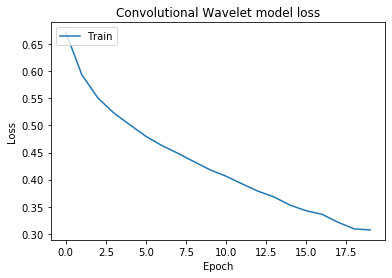

In [37]:
plt.plot(wavelet_conv_qr_history.history['loss'])
plt.title('Convolutional Wavelet model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [38]:
features = generate_features(request_reply_df)
model = fourier_model(features)
fourier_nn_qr_history, fourier_nn_qr_results = train_model(model, request_reply_df)

TypeError: in user code:

    /home/erick/dev/jhu_masters/code/custom_layers.py:23 build  *
        self.kernel = self.add_weight(name='kernel',
    /home/erick/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/keras/engine/base_layer.py:469 add_weight  **
        caching_device=caching_device)
    /home/erick/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/training/tracking/base.py:743 _add_variable_with_custom_getter
        **kwargs_for_getter)
    /home/erick/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/keras/engine/base_layer_utils.py:129 make_variable
        variable_shape = tensor_shape.TensorShape(shape)
    /home/erick/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/framework/tensor_shape.py:771 __init__
        self._dims = [as_dimension(d) for d in dims_iter]
    /home/erick/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/framework/tensor_shape.py:771 <listcomp>
        self._dims = [as_dimension(d) for d in dims_iter]
    /home/erick/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/framework/tensor_shape.py:716 as_dimension
        return Dimension(value)
    /home/erick/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/framework/tensor_shape.py:200 __init__
        None)
    <string>:3 raise_from
        

    TypeError: Dimension value must be integer or None or have an __index__ method, got <tf.Tensor 'sequential_6/fourier_conv_layer/strided_slice:0' shape=(100, 1) dtype=float32>


In [ ]:
plt.plot(fourier_nn_qr_history.history['loss'])
plt.title('Fourier Neural Network loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [ ]:
# features = generate_features(request_reply_df)
# model = wavelet_model(features)
# wavelet_nn_qr_history, wavelet_nn_qr_results = train_model(model, request_reply_df)

In [ ]:
# plt.plot(wavelet_nn_qr_history.history['loss'])
# plt.title('Wavelet Neural Network loss')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Val'], loc='upper left')
# plt.show()

In [ ]:
# features = generate_features(reply_reply_wavelet)
# model = build_conv_model(features)
# wavelet_conv_rr_history, wavelet_conv_rr_results = train_model(model, reply_reply_wavelet)

In [ ]:
# plt.plot(wavelet_conv_rr_history.history['accuracy'])
# plt.plot(wavelet_conv_rr_history.history['val_accuracy'])
# plt.title('Convolutional Wavelet model accuracy')
# plt.ylabel('Accuracy')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Val'], loc='upper left')
# plt.show()

In [ ]:
from sklearn.svm import SVC

In [ ]:
clf = SVC()
clf.fit(X_train, y_train)

In [ ]:
predictions = clf.predict(X_test)
errors = [0 if p == label else 1 for p, label in zip(predictions, y_test)]
svm_accuracy = 1 - (np.sum(errors)/len(errors))
print("Accuracy of support vector classifier:" + str(svm_accuracy))

In [57]:
features = generate_features(high_pass_wavelet)
model = build_fc_model(features)
high_pass_history, high_pass_results = train_model(model, high_pass_wavelet)


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

Epoch 1/25
99/99 [==============================] - 3s 32ms/step - loss: 0.9484 - accuracy: 0.5326
Epoch 2/25
99/99 [==============================] - 2s 15ms/step - loss: 0.6816 - accuracy: 0.5960
Epoch 3/25
99/99 [==============================] - 1s 15ms/step - loss: 0.6417 - accuracy: 0.6364
Epoch 4/25
99/99 [==============================] - 1s 14ms/step - loss: 0.6108 - accuracy: 0.6657
Epoch 5/25
99/99 [==============================] - 1s 14ms/step - loss: 0.5848 - accuracy: 0.6927
Epoch 6/25
99

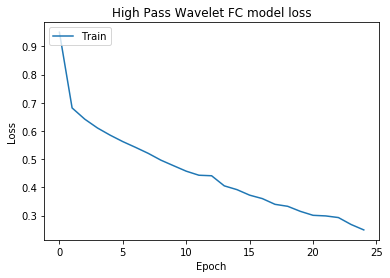

In [58]:
plt.plot(high_pass_history.history['loss'])
plt.title('High Pass Wavelet FC model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [59]:
features = generate_features(high_pass_wavelet)
model = build_conv_model(features)
high_pass_conv_history, high_pass_results = train_model(model, high_pass_wavelet)


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

Epoch 1/25
99/99 [==============================] - 4s 39ms/step - loss: 0.6705 - accuracy: 0.5927
Epoch 2/25
99/99 [==============================] - 2s 17ms/step - loss: 0.6030 - accuracy: 0.6778
Epoch 3/25
99/99 [==============================] - 2s 18ms/step - loss: 0.5641 - accuracy: 0.7200
Epoch 4/25
99/99 [==============================] - 2s 17ms/step - loss: 0.5363 - accuracy: 0.7407
Epoch 5/25
99/99 [==============================] - 2s 17ms/step - loss: 0.5102 - accuracy: 0.7566
Epoch 6/25
99

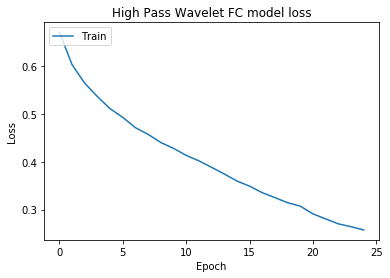

In [60]:
plt.plot(high_pass_conv_history.history['loss'])
plt.title('High Pass Wavelet FC model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [61]:
features = generate_features(low_pass_wavelet)
model = build_fc_model(features)
low_pass_history, low_pass_results = train_model(model, low_pass_wavelet)


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

Epoch 1/25
99/99 [==============================] - 1s 6ms/step - loss: 0.6916 - accuracy: 0.5291
Epoch 2/25
99/99 [==============================] - 0s 3ms/step - loss: 0.6885 - accuracy: 0.5528
Epoch 3/25
99/99 [==============================] - 0s 3ms/step - loss: 0.6878 - accuracy: 0.5528
Epoch 4/25
99/99 [==============================] - 0s 2ms/step - loss: 0.6876 - accuracy: 0.5528
Epoch 5/25
99/99 [==============================] - 0s 3ms/step - loss: 0.6875 - accuracy: 0.5528
Epoch 6/25
99/99 [

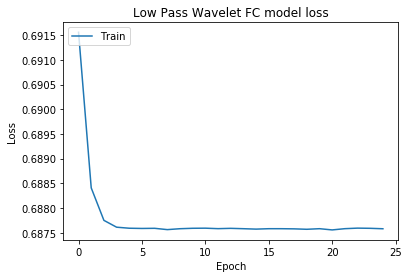

In [64]:
plt.plot(low_pass_history.history['loss'])
plt.title('Low Pass Wavelet FC model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [121]:
def build_summary_model():
    
    model = Sequential()
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))

    model.compile(
        optimizer='SGD',
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    return model

In [125]:
summary_data.dtypes

Malicious               int64
Arithmetic_Mean       float64
Standard_Deviation    float64
Variance              float64
Max                   float64
Min                   float64
Geometric_Mean        float64
Harmonic_Mean         float64
dtype: object

In [127]:
summary_data["Malicious"] = pd.Categorical(summary_data["Malicious"])
summary_data["Malicious"] = summary_data.Malicious.cat.codes

In [129]:
model = build_summary_model()
training = summary_data.copy()
y = training.pop("Malicious")
train_data = tf.data.Dataset.from_tensor_slices((training.values, y.values))
train_dataset = train_data.shuffle(len(training)).batch(1)
model.fit(training_data, epochs=30)

Epoch 1/30
      1/Unknown - 0s 22ms/step

ValueError: logits and labels must have the same shape ((7, 1) vs ())

In [114]:
for feat, targ in train_data.take(5):
    print('Features: {}, Target: {}'.format(feat, targ))
print(X.shape, y.shape)

Features: [5.91859627e+01 1.22067837e+02 1.49005568e+04 6.67421103e+02
 2.31313700e+00 1.64430959e+01 8.62619316e+00], Target: 0
Features: [  22.10321427   34.71520753 1205.14563405  224.698067      3.786087
   12.88222587    9.80347794], Target: 0
Features: [  22.90788412   57.44095974 3299.46385606  423.770189      3.89719
   10.90832751    8.49799987], Target: 0
Features: [2.78508592e+01 6.09393521e+01 3.71360464e+03 4.19315100e+02
 2.87008300e+00 1.24814972e+01 8.96435182e+00], Target: 0
Features: [2.90376568e+01 7.65439209e+01 5.85897183e+03 5.27385950e+02
 2.85697000e+00 1.14984592e+01 8.44215314e+00], Target: 0
(12300, 7) (12300,)


In [ ]:
print("==================================================")
print("=                Overall results                ==")
print("==================================================")
print("    *Request-reply data*")
print("    Fully-Connected test accuracy: {}".format(fc_qr_results[1]))
print("    Convolutional test accuracy: {}".format(conv_qr_results[1]))
print("    Fourier f-c test accuracy: {}".format(fourier_fc_qr_results[1]))
print("    Fourier conv test accuracy: {}".format(fourier_conv_qr_results[1]))
print("    Wavelet f-c test accuracy: {}".format(wavelet_fc_qr_results[1]))
print("    Wavelet conv test accuracy: {}".format(wavelet_conv_qr_results[1]))
print("    Fourier NN test accuracy: {}").format(fourier_nn_qr_results[1])
print("    High-pass Wavelet f-c test accuracy {}".format(high_pass_results[1]))
print("    High-pass Wavelet conv test accuracy {}".format(high_pass_conv_results[1]))
print("    Low-pass Wavelet f-c test accuracy {}".format(low_pass_results[1]))
# print("    Wavelet NN test accuracy: {}").formaat(wavelet_nn_qr_results[1])
print("    Random Forest (control 1) test accuracy: {}".format(rf_accuracy))
print("    Support Vector Machine (control 2) test accuracy: {}".format(svm_accuracy))
# print("    *Reply-reply data*")
# print("    Fully-Connected test accuracy: {}".format(fc_rr_results[1]))
# print("    Convolutional test accuracy: {}".format(conv_rr_results[1]))
# print("    Fourier f-c test accuracy: {}".format(fourier_fc_rr_results[1]))
# print("    Fourier conv test accuracy: {}".format(fourier_conv_rr_results[1]))
# print("    Wavelet f-c test accuracy: {}".format(wavelet_fc_rr_results[1]))
# print("    Wavelet conv test accuracy: {}".format(wavelet_conv_rr_results[1]))